In [1]:
from datascience import *
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Introduction

* Collaboration policy (same as HW, can discuss w/others, can use resources, but code and explanations must be your own)
* timeline
* points and scoring
  * Just for fun questions are optional, don't answer them in the notebook, won't be graded
* Link to clarifications doc: look for Piazza blasts
  * It is your responsibility to check these
* 

# Useful functions

These are useful functions from lecture and the textbook. They've all been defined correctly. You may use any of them for any question in the exam, 

**Warning**: make sure you don't create any variables or functions that have the same names as any of these, or you may not receive credit on parts of the exam.

### Linear regression

These functions are described in lectures 30-34 (Least Squares through Regression Wrapup), and also in Chapter 15 of the textbook.

In [ ]:
def standard_units(arr):
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

def fitted_values(t, x, y):
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

def fitted_value(t, x, y, new_x):
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*new_x + b

def residuals(t, x, y):
    predictions = fitted_values(t, x, y)
    return t.column(y) - predictions

### Miscellaneous

In [ ]:
def first(arr):
    return arr.item(0)

# Question 1

For each of the following cells, fill in the correct value of `a` so that the output is an array with the numbers 2020 and 8. You may only change the first line of each cell: don't change anything else.

(a) (2 points)

In [ ]:
a = ...
# Do not change anything below this line.
b = make_array(2017, 0)
a + b

(b) (2 points)

In [ ]:
a = ...
# Do not change anything below this line.
t = Table().with_columns(
    'year', np.arange(2000, 2030, 10),
    'course', make_array(8, 100, 102),
)
first_col_index = a.item(0)
second_col_index = a.item(1)
year = t.column('year').item(first_col_index)
course = t.column('course').item(second_col_index)
make_array(year, course)

# Question 2: Books and Graphs

Zeynep goes through her family's entire collection of 370 books and records data for each one. She records her data in a table called `books`. The lengths of the books (in pages) are in a column labeled `Length`. 

She notices that all of the books are between 50 and 400 pages, and uses the following line of code to generate a histogram showing the lengths:

```
books.hist('Length', unit='page', bins=np.arange(50, 400, 25))
```

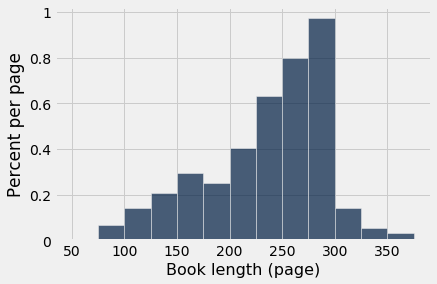

(2 points) What proportion of books are between 200 and 224 pages long (inclusive)? Your answer should be a number between 0 and 1, and should be correct to within .01.

In [ ]:
q21_proportion_books_200_224 = ...

(2 points) Which of the following is closest to the median length?

1. 200
2. 260
3. 315

In [ ]:
median_length_choice = ...

(3 points) Based on the histogram and the information above, which must be true?

1. There are more long books (over 200 pages) than short books (under 200 pages) in her family's collection.
2. The percentage of books between 125 and 149 pages (inclusive) is about 20% (that is, 19-21%).
3. The books in her family's collection are like a random sample from the population of all books.
4. In her family's collection, nonfiction books are longer on average than fiction books.
5. The mean length is less than the median length.

In [ ]:
book_interpretation_choices = ...

Zeynep finds review data for each book online, and adds it to her `books` table in a column called `Rating`. The values in this column are floats between 1 and 5, indicating the number of "stars" the book got, on average.

She computes the following quantities, which are reproduced for you in the cell below:

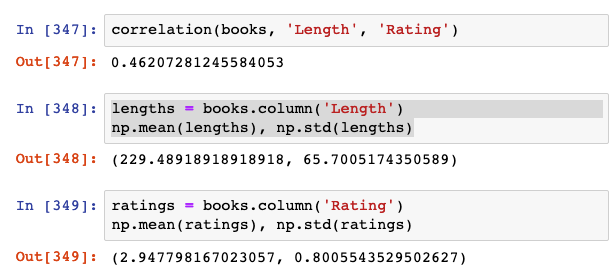

In [ ]:
r = 0.462
length_mean = 229.489
length_sd = 65.7
rating_mean = 2.948
rating_sd = 0.801

In [ ]:
((300 - length_mean)/length_sd * r) * rating_sd + rating_mean

In [ ]:
((4 - rating_mean)/rating_sd * r) * length_sd + length_mean

(2 points) Using linear regression, what would she predict for the average rating of a book with 300 pages?

In [ ]:
book_with_300_pages_avg_rating = ...

(2 points) Using linear regression, what would she predict for the length of a book with an average rating of 4 stars?

In [ ]:
book_with_4_stars_length = ...

(4 points) Fill in the blank: when predicting average rating from book length, at least 93.75% of the predictions will be correct to within ___ stars of the true value.

*Hint*: $93.75\%$ is the same as $1 - \frac{1}{16}$.

In [ ]:
range_of_accurate_book_predictions = ...

# Question 3: Actors

Recall the `actors` table from lecture:

In [ ]:
actors = Table.read_table('actors.csv').where('Number of Movies', are.above(10))
actors.show(3)

You can find a description of the columns in [Chapter 7](https://www.inferentialthinking.com/chapters/07/Visualization.html) of the textbook. Note that just like in lecture and the textbook, we've removed Anthony Daniels since he's an outlier.

## Part 1: Fits, correlations, and residuals

(2 points) Which of the following must be true about the actors in the table above? All the statements involve the relationship between the number of movies the actor has been in and the average per movie. You may use the provided cell (or any additional ones you create) to make plots or do any computation that will help you answer the question.

1. Being in more movies causes actors to make less money for each one.
2. There is a *negative* association between the number of movies an actor is in and the average they earn for each one.
3. There is a *positive* association between the number of movies an actor is in and the average they earn for each one.
4. When predicting the average gross per movie from the number of movies, the linear regression line is guaranteed to give a better prediction (lower RMSE) than any nonlinear function.

In [ ]:
# You may use this cell for any scratch work, graphs, or computation to help you answer the question above, but we won't
# use any of it when grading your work.

In [ ]:
num_movies_avg_per_movie_statements = ...

Letitia and Adoor are debating the best way to predict the total box office receipt of all an actor's movies (i.e., the `Total Gross` column). Letitia wants to predict using how well an actor's \#1 movie did (i.e., the `Gross` column), and Adoor wants to predict using the total number of movies they've been in (i.e., the `Number of Movies` column). The construct the following scatter plots, and compute that the correlations are 0.511 (left, Adoor) and 0.407 (right, Letitia).

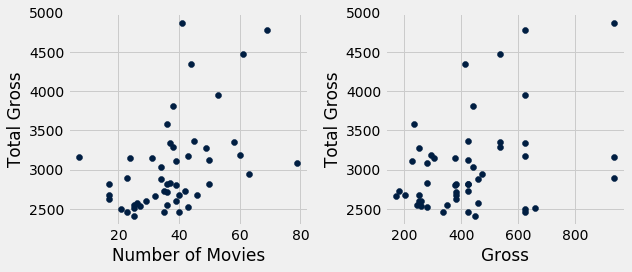

They also create the following residual plots:

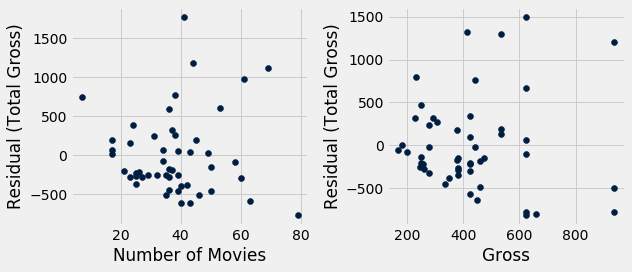

(2 points) For each plot, identify which of the following problems are present in each of the two residual plots:

1. The residual plot has a nonlinear pattern.
2. The residual plot has a linear trend.
3. The residual plot is heteroscedastic (that is, the variance is uneven).

In [ ]:
number_of_movies_residual_problems = ...
top_gross_residual_problems = ...

## Part 2: A different error

For the remainder of this question, we'll focus on using the box office gross from the actor's top movie (that is, the `Gross` column) to predict the total box office receipt from all the actor's movies (that is, the `Total Gross` column).

Recall that when learning about linear regression, we used root mean square error (RMSE). Here's a function that computes it:

In [ ]:
def rmse(predictions, actual_values):
    """
    Takes an array of predictions and an array of actual observed values, and returns
    the root mean squared error.
    """
    error = actual_values - predictions
    squared_error = error ** 2
    mean_squared_error = np.mean(squared_error)
    return np.sqrt(mean_squared_error)

(3 points) Letitia decides that instead of using RMSE, she wants to use a *weighted error*. She wants to find a prediction that's more accurate for actors like her who've been in fewer movies, and doesn't care as much about actors who've been in lots of movies. So, she comes up with the following way to compute the *weighted RMSE* for a prediction line:

1. Compute the squared error, just like before.
2. For each actor, *divide* the squared error by the weights (i.e., the number of movies the actor has been in). The result of this division will be called the weighted squared error for each actor.
3. Compute the average weighted squared error.
4. Take the square root.

Complete the function below to implement the procedure described here.

In [ ]:
def weighted_rmse(predictions, actual_values, weights):
    error = actual_values - predictions
    ...
    return ...

*TODO* public test that makes sure they're using the argument and not `actors.column('Number of Movies')`

(4 points) Complete the function below, which takes in the slope and intercept for any line, and computes the weighted RMSE for predicting these actors' total box office gross using that line.

*Hint*: your solution should use the `weighted_rmse` function you defined above.

In [ ]:
def weighted_prediction_error(any_slope, any_intercept):
    
    return ...

(4 points) Find the slope and intercept of the line whose predictions have the smallest weighted RMSE.

In [ ]:
...
best_weighted_slope = ...
best_weighted_intercept = ...

The code below plots the original linear regression line (dark blue) and the line with the smallest weighted RMSE (light blue). The size of each dot represents the number of movies that actor has been in.

In [ ]:
# Do not change any of the code in this cell. 

# You don't have to answer any questions here or understand how this cell works: 
# it just shows you the result of your work.
x = actors.column('Gross')
y = actors.column('Total Gross')
weights = actors.column('Number of Movies')

x_plot = make_array(169, 937)
regression_line = x_plot * best_weighted_slope + best_weighted_intercept
weighted_line = x_plot * slope(actors, 'Gross', 'Total Gross') + intercept(actors, 'Gross', 'Total Gross')
plots.figure()
plots.scatter(x, y, s=(weights ** 2) / 30, c='black')
plots.plot(x_plot, regression_line, color='tab:blue')
plots.plot(x_plot, weighted_line, color='tab:orange')
plots.xlabel('Gross')
plots.ylabel('Total Gross')

# Question X: Gardening

Silla isn't very good at keeping his plants alive, so he decides to try using a classifier to predict whether the plants into his garden will survive. He spends from March 17 until May 12 (8 weeks) collecting data for each plant on:

* **`Water`**: a float, the average amount of water he gave it per week (in ounces),
* **`Pot Size`**: a float, the size of the pot the plant was in (in gallons)
* **`Survived`**: a boolean, whether or not the plant was alive on May 12

He trains a $k$-nearest neighbor classifier on his data, and uses $k=3$.

He also draws the following scatterplot, marking plants that survived with blue circles and plants that died with red squares. Assume all his plants are shown here:

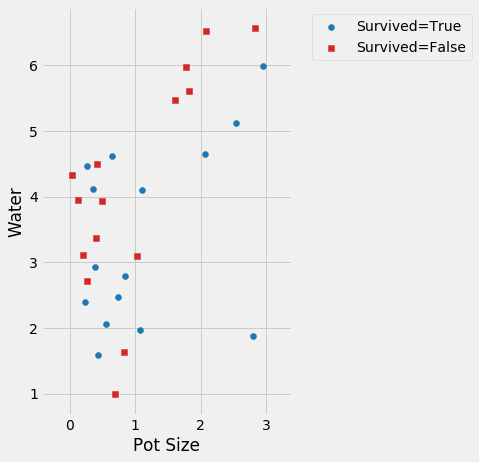

For each of the following questions, you should answer one of:
* `True`, if the prediction is that the plant would survive
* `False`, if the prediction is that the plant would die,
* A string with an explanation if it isn't appropriate to use his classifier to answer the question.

For example, if a question asked "How tall will his tallest plant be?", then your answer should be `"The classifier can't predict how tall plants are, only whether or not they survive"`.

(2 points) Suppose Silla had planted an extra plant in a 0.25-gallon pot that received 3.5 ounces of water per week. Would it have survived? 

(2 points) Silla was taking care of his roommate's plant (which isn't shown in the graph above). It was in a 2.5-gallon pot, and he gave it 5 ounces of water per week. Did it survive?

(2 points) Silla was taking care of his other roommate's plant (which also isn't shown in the graph above). It was in a 6-gallon pot, and he gave it 6 ounces of water per week. Did it survive?

(2 points) Silla graduates and moves from Berkeley to Miami, Florida. To remind himself of his Berkeley apartment, he buys some of the same plants he had before. He puts one in a 0.25-gallon pot, and gives it 4.5 ounces of water per week for 8 weeks. Will it survive?

# Question 4: Electricity

The table `electricity` contains data for 200 randomly sampled energy utilities from the US in 2017.

In [ ]:
electricity = Table.read_table('electricity2017_sample.csv').drop('Power in')
electricity.show(3)

It has the following columns:
* **`Name`**: a string, the name of the utility
* **`State`**: a string, the two-letter abbreviation for the state the utility operates in
* **`Type`**: a string, the type of utility 
* **`Residential customers`**: an int, the number of residential customers the utility serves
* **`Revenue`**: a float, the total revenue for the utility in 2017 measured in thousands of dollars
* **`Power generated`**: a float, the amount of power the utility generated itself (in megawatt-hours)
* **`Power bought`**: a float, the amount of power the utility bought or exchanged from other utilities (in megawatt-hours)
* **`Summer demand`**: a float, representing peak demand in the summer (in megawatts)
* **`Winter demand`**: a float, representing peak demand in the winter (in megawatts)

(3 points) Janea wants to use this random sample to understand energy utilities more broady. In particular, she wants to estimate the following quantities from the sample:

1. The maximum number of residential customers served by any energy utility in the US
2. The average (mean) demand in the summer across all energy utilities in the US
3. The median revenue of all energy utilities in Hawaii
4. The slope of a linear prediction of winter demand from summer demand, across all energy utilities in the US

If she decides to use the bootstrap to construct a 95% confidence interval, which of the quantities above are good choices for this technique?

In [ ]:
good_electricity_bootstrap_candidates = ...

(3 points) 

(4 points) You find some notes on how to construct a confidence interval using the bootstrap, but they're out of order. Assign the name `bootstrap_steps_order` to the correct reordering of the following steps.

For example, if the correct order is to reverse the steps, then the answer would be `make_array(9, 8, 7, 6, 5, 4, 3, 2, 1)`.

1. Write a function that computes the statistic you're interested in from a table.
2. Write a function that computes the statist

(2 points) Javier runs a utility, and wants to predict what his revenue will be based on summer demand. He isn't sure whether linear regression is a good fit: create a plot to help convince him that it is.

In [ ]:
# Code to create a plot goes here.
...

(5 points) Javier's utility had 90 megawatts of demand this summer. He uses the bootstrap to construct a 95% confidence interval for the prediction of its revenue based on linear regression, and finds that the interval is \\$40.6 to \\$45 million dollars (remember, the `Revenue` column is in thousands of dollars).

Which of the following must be true?

1. 95% of utilities in the sample had revenue between \\$40.6 and \\$45.0 million dollars.
2. In 95% of Javier's bootstrap samples, the height of the regression line at $x=90$ was between 40600 and 45000 (that is, \\$40.6 and \\$45 million dollars).
3. In the population of all US energy utilities, 95% of the ones with 90 megawatts of summer demand have between \\$40.6 and \\$45 million dollars of revenue.
4. There is a 95% chance that Javier's utility's revenue this year will be between \\$40.6 and \\$45 million dollars.
5. When drawing a sample of 200 US energy utilities, there is a 95% chance that the average revenue for utilities with 90 megawatts of summer demand will be between \\$40.6 and \\$45 million dollars.


In [ ]:
revenue_demand_prediction_choices = ...

(4 points) Javier wants to estimate the difference between the average size (number of customers) of municipal utilities (owned by local governments) and cooperative utilities (owned by customers). Help him by completing the function below:

In [ ]:
def compute_municipal_cooperative_difference(tbl):
    """ 
    Given a table with columns 'Type' and 'Residential customers', 
    returns the difference between  the average size of municipal utilities
    and cooperative utilities.
    """
    return ...

*TODO*: public test that runs the function on the original table and compares to the right answer, to help avoid cascading errors

*TODO*: public test that runs the function on a smaller table to make sure they're using the argument and not hardcoding the original electricity table

(4 points) Javier wonders: if his sample had been different, could he have gotten a different answer? Complete the code below, which computes 10,000 bootstrap samples of the statistic from the previous part and saves them in the array `bootstrap_utility_differences`.

In [ ]:
bootstrap_utility_differences = ...
for i in ...:
    resample = ...
    bootstrap_utility_differences = ...

(3 points) Javier's favorite number is 92, so he wants to make a 92% confidence interval to estimate the value of the statistic above in the population. Use the `bootstrap_utility_differences` to assign `bootstrap_utility_left` and `bootstrap_utility_right`:

In [ ]:
bootstrap_utility_left = ...
bootstrap_utility_right = ...

# Question 5: US Counties and Food Deserts

A [food desert](https://en.wikipedia.org/wiki/Food_desert) is an area that has limited access to nutritious food. In this question, we'll look at food access data for US counties from 2010 to 2015.


In [ ]:
food_access = Table.read_table('food_access_2010_2015.csv')
food_access.show(3)

The `food_access` table contains one row for each county in the 50 states of the US.

It has the following columns:
* **`county`**: a string, the name of the county
* **`population`**: an int, the number of people living in that county
* **`state`**: a string, the two-letter abbreviation for the state the county is in
* **`housing_units`**: an int, the number of housing units available in the county
* **`urban_pct`**: a float between 0 and 100, the percentage of housing units that are urban in the county
* **`low_access_1`**: an int, the number of people in that county living more than one mile away from their nearest grocery store
* **`low_access_10`**: an int, the number of people in that county living more than ten miles away from their nearest grocery store
* **`low_access_20`**: an int, the number of people in that county living more than twenty miles away from their nearest grocery store
* **`carless_pct`**: a float between 0 and 100, the percentage of people in that county who don't have a car in their household

In this question, you'll also work with the `states` table:

In [ ]:
states = Table.read_table('states.csv')
states.show(3)

For each state, the table has:
* **`State`**: a string, the name of the state
* **`State Code`**: a string, the two-letter abbreviation for the state
* **`Region`**: a string, which region the state belongs to
* **`Division`**: a string, which division the state belongs to

If you're curious about what the regions and divisions are (and what the difference between them is), see [this map from the US Census Bureau](https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf).

### Part 1: Graphs

For each of the following questions, create a graph that would help answer the question. You don't need to answer the question itself in this notebook: just make a graph.

(2 points) Do some states have more counties than others? If so, which ones?

(2 points) What kind of relationship is there between car ownership and how urban a county is?

### Part 2: Table manipulation

For each of the following questions, write Python code that computes (or draws) the specified quantity, table, or graph.

(2 points) The number of people living more than 10 miles away from a grocery store in Alameda County, where UC Berkeley is.

In [ ]:
num_people_more_than_10_miles_away_alameda_county = ...
num_people_more_than_10_miles_away_alameda_county

(0 points) *Just for fun*: Same as the above question, but for any other county in California that you've lived in or spent time in. Do the results surprise you?

(2 points) The number of counties with over 1,000,000 people.

In [ ]:
...
num_counties_with_over_million_people = ...
num_counties_with_over_million_people

(3 points) The county in California that has the most people living far away (>10 miles) from a grocery store.

In [ ]:
...
california_county_most_food_deserted = ...
california_county_most_food_deserted

(3 points) A table with one row for each state, and two columns: the two-letter abbreviation for the state, and the total number of housing units in that state.

In [ ]:
...
housing_units_per_state = ...
housing_units_per_state

(5 points) An array with the three states with the highest percentage of their populations living more than ten miles from their nearest grocery store.

In [ ]:
by_state = ...
by_state = by_state.with_column(
    'low_access_10_proportion', ...
)

state_with_highest_percentage_over_10_miles_away = ...
state_with_highest_percentage_over_10_miles_away

(6 points) A table with the largest state (by population) in each region. It should have one row for each division, and two columns: one with the name of the division and one with the name (not the two letter abbreviation) of the most populated state in that division. The names of the columns don't matter, but they must be in that order.

(*Hint*: you may find the `first` function helpful: we've defined it for you in the useful functions section at the top.)

In [ ]:
state_populations = ...
...
biggest_state_for_each_division = ...

### Part 3: relationships between quantities

For the rest of this question, instead of looking at the number of people without access to a grocery store, we'll look at the percentage.

We'll use the following terms:

* *low access at 1 mile*: the percentage of people in a county whose nearest grocery store is at least 10 miles away
* *low access at 10 miles*: the percentage of people in a county whose nearest grocery store is at least 10 miles away

In [ ]:
food_access_with_pcts = food_access.with_columns(
    'low_access_1_pct', food_access.column('low_access_1') / food_access.column('population') * 100,
    'low_access_10_pct', food_access.column('low_access_10') / food_access.column('population') * 100,
    'low_access_20_pct', food_access.column('low_access_20') / food_access.column('population') * 100,
).drop('low_access_1', 'low_access_10', 'low_access_20')
food_access_with_pcts.show(3)

(5 points) Create one plot that you'd use to answer the following question, then answer the related multiple choice question below:

Is there any association between the percentage of urban housing and low access at **10 miles** in US counties?

In [ ]:
# Code to generate your plot goes here


Based only on the data in the table (and the graph you created using that data), which must be true?
1. Knowing the percentage of urban housing in a county cannot help us predict low access at 10 miles.
2. There is a strong linear association between percentage of urban housing and low access at 10 miles.
3. The distribution of low access at 10 miles is different between non-urban counties (<5% urban housing) and other counties.
4. For counties that are very urban (>80% urban housing), more than half of their population is within 10 miles of a grocery store.

In [ ]:
choices = ...

(5 points) Create one plot that you'd use to answer the following question, then answer the related multiple choice question below:

Is there any association between the percentage of urban housing and low access at **1 mile** in US counties?

In [ ]:
# Code to generate your plot goes here


Based only on the data in the table (and the graph you created using that data), which must be true?

1. For counties with some urban housing (>5%), there is a negative association between the percentage of urban housing and low access at 1 mile.
2. For counties in the US, having more urban housing causes more grocery stores.
3. Increased 

(2 points) What is the correlation between percentage of urban housing and low access at 1 mile?

(*Hint*: You may find some of the functions defined in the "Useful functions" section helpful).

In [ ]:
correlation_urban_low1 = ...
correlation_urban_low1

(2 points) For counties with any urban housing (that is, more than 0%), what is the correlation between percentage of urban housing and low access at 1 mile?

(*Hint*: You may find some of the functions defined in the "Useful functions" section helpful).

In [ ]:
correlation_urban_low1_urban_cty = ...
correlation_urban_low1_urban_cty

# Question 6: Likes on Instagram

Natalia, an engineer at Instagram, conducts a randomized controlled experiment to evaluate whether social media anxiety is reduced when users can't see the number of likes shown on a post. When the next Instagram software update ships, she randomly assigns 10,000 users in the city of Berkeley to no longer be able to see the number of likes (Group A) and 8,000 to still be able to see the number of likes (Group B).

One month after shipping the new update, she measures each user's happiness and general sentiment towards Instagram with a survey. She wants to test the claim that the treatment (i.e. hiding the number of likes) increases users' happiness scores.

She prepares a table `instagram_users`, containing 18,000 rows, one for each user in her experiment. She can't share the full dataset with you since it's proprietary, but she chooses 3 random rows to show you, just so you can see what it looks like:

In [ ]:
instagram_users = Table.read_table('instagram_sample.csv')
instagram_users

* **`sex`**: a string, the user's sex (`Male` or `Female`)
* **`age`**: an int, the user's age
* **`group`**: a string, the user's group for the experiment (`A` or `B`)
* **`happiness`**: an int, the user's happiness score from the survey (between 0-100)
* **`sentiment`**: a string, the user's sentiment from the survey (`Positive`, `Neutral`, or `Negative`)

TODO add null

For her test statistic, Natalia decides to use the difference between the average happiness scores of Group A and Group B (that is, the average of Group A minus the average of Group B).

(6 points) Natalia asks her coworker for help simulating one value of the test statistic under the null hypothesis, but the code he gives her has some mistakes. Fix the code below so that it correctly computes the test statistic.

In [ ]:
# This code contains mistakes that you need to fix.

def compute_instagram_test_statistic():
    # Shuffle the data
    shuffled_groups = instagram_users.take('group').sample(with_replacement = False)

    users = users.append('shuffled_groups', shuffled_groups.column(1))
    # Two averages
    mean_A = np.average(users.where('shuffled_groups', 'A').select('group'))
    mean_B = np.average(users.where('shuffled_groups', 'B').select('group'))
    # Test statistic
    return mean_A - mean_B

(4 points) In the question above, why do we shuffle the data? Choose all that apply.

1. Under the null hypothesis, the label of being in group A or group B doesn't matter.
2. We want to randomize treatment control to establish causation
3. We want to simulate two groups of people whose expected happiness is identical under the null hypothesis.
4. We want to ensure that the users in the experiment are selected randomly.

In [ ]:
instagram_shuffling_reasons = ...
instagram_shuffling_reasons

Natalia fixes the code, and simulates 10,000 values of the test statistic under the null hypothesis. She shows them in the histogram below. You should assume that the histogram shows all of the simulated values.

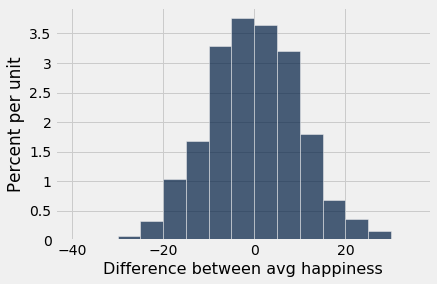

(4 points) Which of the following must be true?

1. If the $p$-value cutoff for the test is 0.01 and the observed test statistic is 35, then we should conclude the data are more consistent with the alternative hypothesis.
2. Seeing the number of likes on a post has no effect on user happiness.
3. Seeing the number of likes on a post has a positive effect on user happiness.
4. If the $p$-value cutoff for the test is 0.05 and the observed test statistic is 10,  then we should conclude the data are more consistent with the null hypothesis.
5. Seeing the number of likes on a post has a negative effect on user happiness.

In [ ]:
instagram_null_simulation_choices = ...

(4 points) Suppose Natalia now tells you the observed test statistic was 39.3. Which conclusion(s) are the data consistent with?

1. The difference in happiness scores between group A and group B is due to chance alone
2. The treatment has a positive association with happiness scores
3. The treatment has a positive effect on happiness scores
4. The treatment increased users' happiness scores by 0.2
5. There isn't enough information to make a conclusion of any kind

In [ ]:
instagram_test_conclusion_choices = ...

For the remainder of this question, instead of testing for an increase in happines scores, Natalia would like to test whether the treatment (i.e. hiding the number of likes) changes users' `sentiment`: that is, she's only interested in seeing whether the sentiment is significantly different. She comes up with the alternative hypothesis below: provide a null hypothesis and a test statistic she could use for her test.

(3 points) Null hypothesis:

*Your answer here*

Natalia's alternative hypothesis is:

*There is no difference in the distribution of user sentiment between treatment (hiding the number of likes) and control (showing the number of likes).*

(3 points) What would be a valid test statistic to tell the two hypotheses above apart?

*Your answer here*

(3 points) Natalia and her coworker are deciding whether to roll this feature out worldwide. Her coworker wants to collect more data, and develops a sentiment analysis algorithm that analyzes the content of images and captions that people post to automatically determine their sentiment (positive, negative, or neutral).

Describe, in two sentences or less, any privacy concerns that you would have around the collection of this data.

*Your answer here*

# Question 7: The Office

The Data 8 instructors start arguing over one of their favorite TV shows, and decide to resolve their debates using data. They find data on how many words each character speaks in each episode of the show The Office in the table `office`. 

In [ ]:
office = Table.read_table('the_office.csv')
office.show(3)

The table contains the following columns:
* **`season`**: an int, indicating which season of the show
* **`episode`**: an int, indicating which episode within that season the data is for
* **`overall_episode`**: an int, indicating the episode number within the entire show (for example, since the first season has 6 episodes, the first episode of the second season is the seventh episode overall)
* **`speaker`**: a string, the name of the character
* **`num_words`**: an int, the number of words that character spoke in that episode

For example, the second row indicates that the character Dwight said 296 words in the first episode of the first season.

(6 points) In order to make graphs of how much the characters speak over the course of the show, we'll need to write a function that takes an array of character names and returns a table with one row per overall episode number, one column for the episode numbers, and a column for each character in the array, where the values are the total . For example, calling `get_character_episode_table(make_array('Jim', 'Dwight', 'Pam'))` should give you a table whose first few rows look like:

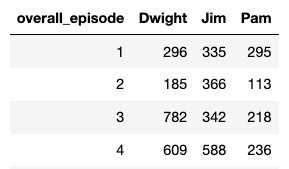

(*Hint*: the predicate `are.contained_in` might be helpful.)

In [ ]:
def get_character_episode_table(character_names):
    """
    Takes an array of character names, and returns a table like the one shown above.
    """
    return ...

(2 points) Use the function you just wrote to make a graph comparing how much Jim and Dwight speak from episode to episode.

In [ ]:
# Code to create your graph goes here


Ramesh and Swupnil start arguing over Season 8's popularity, and find the following data to help support their claims: 

In [ ]:
office_viewers = Table.read_table('office_wikipedia.csv')
office_viewers.show(3)

The table has the following columns:
* **`Overall number`**: an int, indicating the episode number within the entire show (for example, since the first season has 6 episodes, the first episode of the second season is the seventh episode overall)
* **`Name`**: a string, the episode name
* **`Writer`**: a string, the person or people who wrote the script for that episode
* **`Millions of viewers`**: a float, the number of viewers, in millions, who watched that episode when it aired on live TV (on NBC).

(0 points) *Just for fun*: Which episode had the most viewers and why?

(3 points) Using the two tables above (`office_viewers` and `office`), make a new table that has one row for each episode of the show, and three columns: **`season`**, **`overall_episode`**, and **`Millions of viewers`**.

In [ ]:
overall_and_season = office.group(['overall_episode', 'season']).select(0, 1)
office_season_viewers = ...
office_season_viewers.show(3)

(2 points) Ramesh thinks that Season 8 is significantly less popular (measured by number of viewers) than any other season of the show. Swupnil disagrees. They decide on the following null and alternative hypotheses for their test:

**Null hypothesis**:

The average viewer count for Season 8 is like the average viewer count for the same number of episodes picked at random from the entire show.

**Alternative hypothesis**:

No, the average viewer count for Season 8 is lower.

Which hypothesis supports Swupnil's argument? Assign the variable `season_8_swupnil` to either `'null'` or `'alternative'`:

In [ ]:
season_8_swupnil = ...

(3 points) Based on the null and alternative hypothesis above, describe a test statistic they could use to conduct a hypothesis test:

*Your answer here*

(4 points) They decide on a $p$-value cutoff of $0.01$, and carry out the test using a correct test statistic.

They obtain a $p$-value of 0. Based only on this data, which must be true?

1. The probability that Swupnil is right is 0.
2. The probability that Ramesh is right is 0.
3. The data support the alternative hypothesis.
4. The data support the null hypothesis.

In [ ]:
season_8_test_conclusions = ...

# Question 8: Bread

## Part 1: Frozen slices

Ilin buys too much bread, so she decides to slice it and put it in her freezer. She has three loaves of bread: one rye, one sourdough, and one multigrain. She slices each loaf: **the rye bread has 8 slices, the sourdough bread has 5 slices, and the multigrain bread has 12 slices**. In each loaf, two of the slices are "heels" (the slice at each end). She puts all the slices into a giant bag and mixes them up. Each day, she pulls out one slice at random and eats it.

For the first four parts of this question, provide the specified probability before she starts eating any of the bread.

(2 points) What is the probability that her first slice is rye?

(2 points) What is the probability that in her first two slices, she doesn't get any sourdough?

(2 points) What is the probability that the first three slices are all heels?

(3 points) The first slice she pulls out is a heel. What is the probability that it is sourdough?

## Part 2: Quality control

Jin is in charge of quality control at a large bakery that makes tens of thousands loaves of bread each day. Each loaf is advertised as weighing 500 grams, but the exact weight varies a little bit from loaf to loaf.

Jin has had complaints from customers that their bread weighed less than 500 grams. He speaks with the bakers, who assure him that the average loaf weighs 500 grams, and that the standard deviation of the loaf weights is 5 grams. They show him the following distribution of weights that the loaves are supposed to follow:

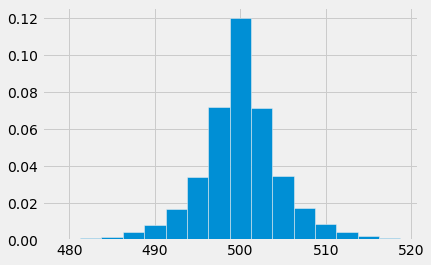

(3 points) To verify this, he plans to hire 1000 auditors to come into the bakery, and each one will randomly sample 100 loaves and weigh them. Each auditor will tell Jin the average weight of those 100 loaves.

Assuming the bakers are correct, about how many of the 1000 auditors will find an average weight below 499 grams? Your response should be a number between 0 and 1000.

(3 points) When Jin discusses this idea with his peers, they tell him it's much too expensive. Instead, they suggest hiring one auditor, and asking the auditor to collect a larger random sample of 225 loaves.

Assuming the bakers are correct, approximately what is this probability that the auditor will find an average weight below 499 grams? Your response should be a number between 0 and 1.